In [1]:
!pip install ultralytics
!pip install opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 17.3 MB/s eta 0:00:00


Setup and Importing the libraries 

In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Load the pre-trained YOLOv8 model
detection_model = YOLO('yolov8n.pt')  # Load YOLOv8 model for object detection



Object Detection

In [11]:
# Path to the input image
image_path = "/content/input.jpg"

# Perform object detection
detection_results = detection_model.predict(image_path)  # Run detection on the image

# Extract the detection results
detection_result = detection_results[0]  # Get results for the first (and only) image
boxes = detection_result.boxes.xyxy.cpu().numpy()  # Bounding boxes in [x1, y1, x2, y2] format
scores = detection_result.boxes.conf.cpu().numpy()  # Confidence scores
classes = detection_result.boxes.cls.cpu().numpy()  # Class IDs
class_names = detection_model.names  # Class names from the model



image 1/1 /content/input.jpg: 448x640 5 persons, 1 cup, 1 dining table, 2 laptops, 2 cell phones, 2 books, 424.6ms
Speed: 2.9ms preprocess, 424.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Visualization 

<ipython-input-12-a963348a760d>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(class_names))  # Get a colormap for colors


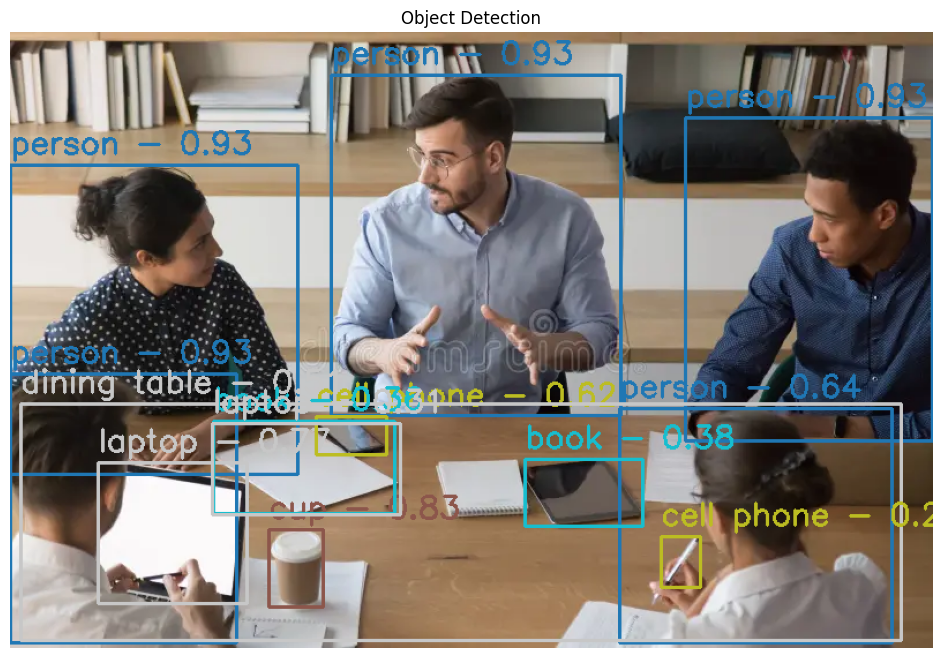

In [12]:
def visualize_detection(image_path, boxes, scores, classes, class_names):
    # Load and convert the image to RGB
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    # Create a copy of the image to draw bounding boxes on
    image_with_boxes = image_rgb.copy()

    # Define colors for different classes
    colors = plt.cm.get_cmap('tab20', len(class_names))  # Get a colormap for colors

    # Draw bounding boxes and labels on the image
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)  # Get bounding box coordinates
        class_id = int(classes[i])
        score = scores[i]
        class_name = class_names[class_id]
        label = f'{class_name} - {score:.2f}'

        # Generate a color for the current class
        color = colors(class_id)[:3]  # RGB color from the colormap

        # Draw rectangle and label on the image
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (int(color[0]*255), int(color[1]*255), int(color[2]*255)), 2)  # Draw box
        cv2.putText(image_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (int(color[0]*255), int(color[1]*255), int(color[2]*255)), 2)  # Draw label

    # Plot the results
    plt.figure(figsize=(12, 8))
    plt.imshow(image_with_boxes)  # Display the image with bounding boxes
    plt.title("Object Detection")
    plt.axis('off')  # Turn off axis
    plt.show()  # Show the plot

# Run the visualization function
visualize_detection(image_path, boxes, scores, classes, class_names)
